In [84]:
# Standart data analysis libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as RMSE

In [85]:
df = pd.read_csv('internship_train.csv')

In [86]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304
5,70,299,297,350,428,359,5.830952,0.505189,1,73,...,1.486867,0.366128,11.245683,6.116113,9.315978,4.063209,7.156703,12.132241,14.141104,34.505189
6,457,363,162,67,388,326,-1.414214,0.604309,0,258,...,8.260282,5.239815,1.163579,10.797268,5.819056,4.451118,14.645322,11.739865,14.763017,2.604309
7,414,271,163,317,359,116,-6.324555,0.022464,0,485,...,5.925065,6.080010,11.318467,11.013787,12.137311,2.759765,10.537518,4.243830,3.232530,40.022464
8,420,85,378,71,243,301,-8.602325,0.228071,0,401,...,5.483159,1.534398,4.690240,11.142059,12.290323,1.975012,11.061706,14.486846,13.244187,74.228071
9,445,304,359,298,141,369,8.774964,0.919384,1,63,...,12.267670,4.999463,0.376892,0.121794,0.914422,12.471633,13.760204,14.500278,4.583603,77.919384


In [87]:
df.shape

(90000, 54)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

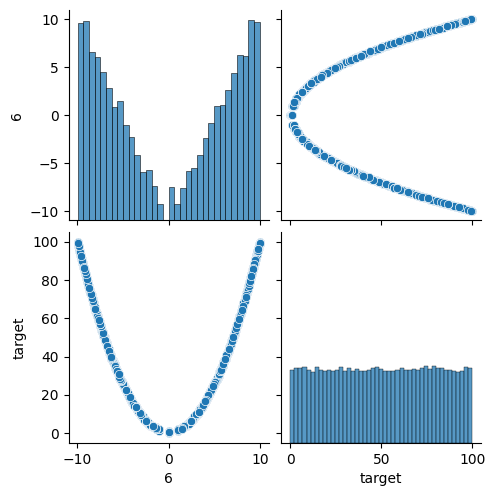

In [89]:
sns.pairplot(df[['6','target']])

In [90]:
x = df['6'].values
x

array([-4.47213595,  7.81024968,  8.60232527, ...,  6.164414  ,
       -3.60555128,  7.68114575])

In [91]:
target = df['target'].values
target

array([20.10747174, 61.76371332, 74.651162  , ..., 38.63370433,
       13.68730853, 59.61320747])

In [92]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [93]:
poly_features = poly.fit_transform(x.reshape(-1, 1))

In [94]:
poly_reg_model = LinearRegression()

In [95]:
model = poly_reg_model.fit(poly_features, target)

In [96]:
y_predicted = model.predict(poly_features)
y_predicted

array([20.49829929, 61.49813125, 74.49833919, ..., 38.49778394,
       13.49807844, 59.49809987])

In [97]:
RMSE(target, y_predicted)

0.08333588078969474

In [98]:
test = pd.read_csv('internship_hidden_test.csv')

In [99]:
poly_test_feature = poly.fit_transform(test['6'].values.reshape(-1,1))

In [100]:
prediction = model.predict(poly_test_feature)

In [101]:
pd.DataFrame({'prediction':prediction}).to_csv('Solution.csv')